# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [5]:
data.dropna(how ='any', inplace = True)

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [7]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

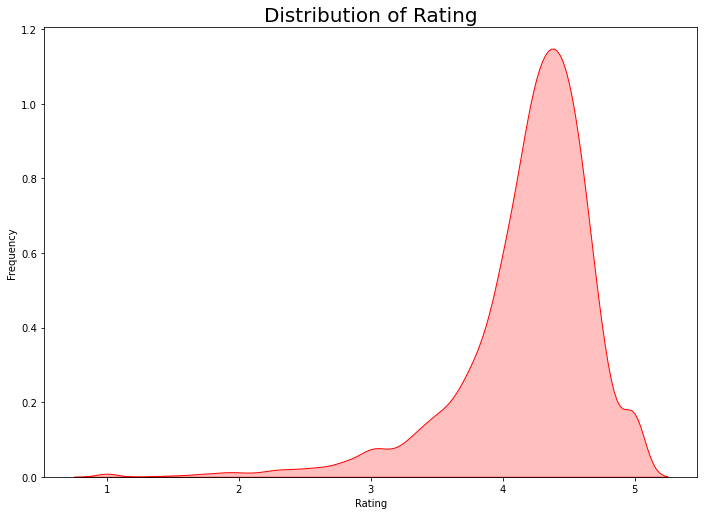

In [8]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Средняя оценка приложения в магазине больше 4, что очень много.

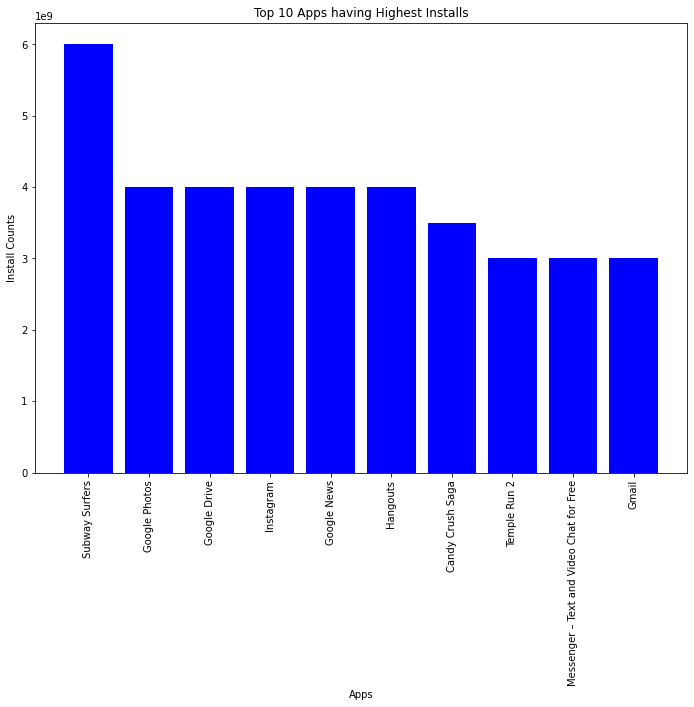

In [9]:
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = data[data['Category'] == '1.9'].index
data.loc[i]
data = data.drop(i)

data['Installs'] = data['Installs'].astype(int)
res = data.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

В топ 5 входит 3 приложения от Google.

Text(0, 0.5, 'Size')

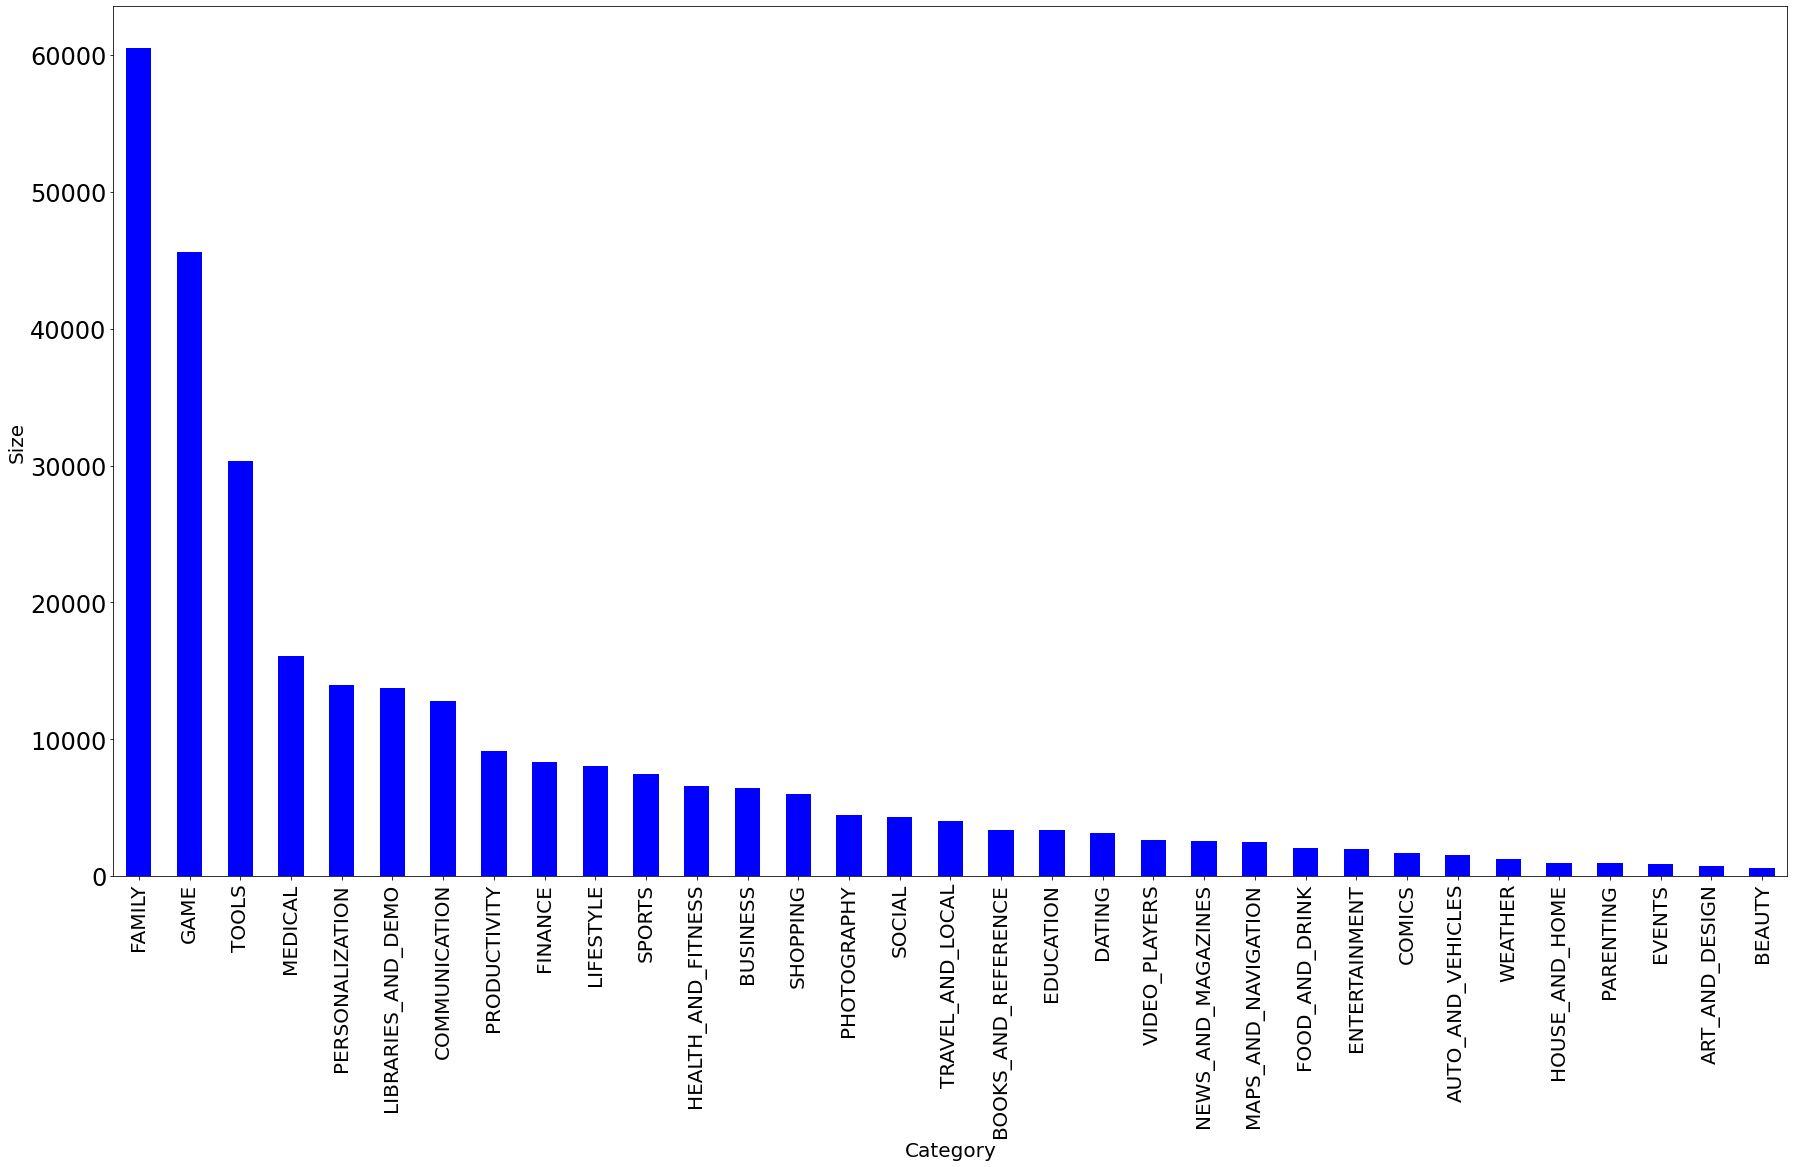

In [10]:
data.loc[data['Size'] == 'Varies with device'].shape
unwanted = data.loc[data['Size'] == 'Varies with device']
unwanted.shape
data.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('k',''))
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')
res = data.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

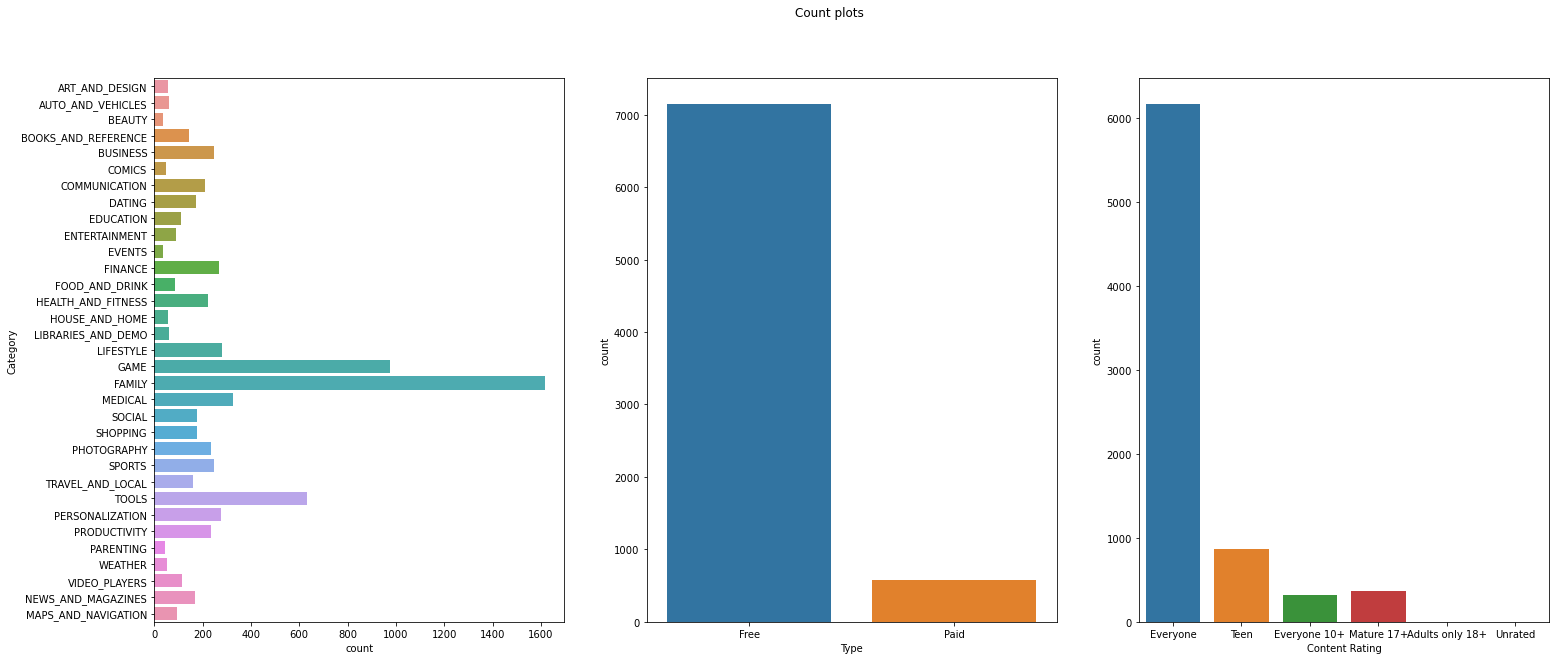

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=data,ax=ax1)
sns.countplot('Type',data=data,ax=ax2)
sns.countplot('Content Rating',data=data,ax=ax3)
plt.show()

Большенство скачивают бесплатные приложения из категорий Famaly, Games и Tools.

In [12]:
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

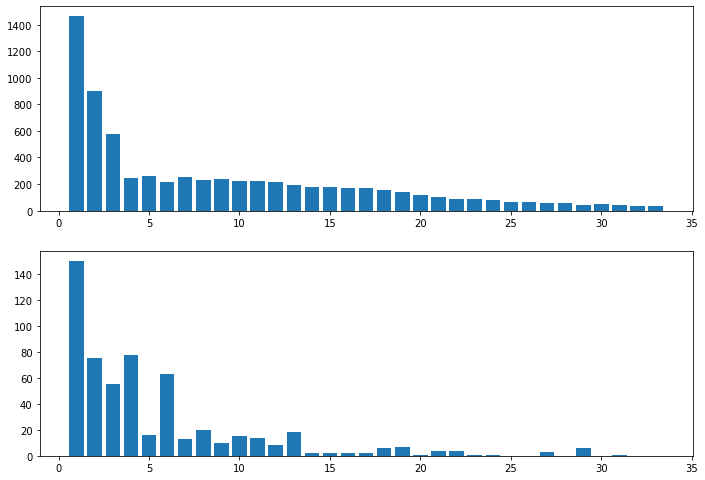

In [13]:
data_filter = data[['Rating', 'Type', 'Category']]
# Describe Rating dataframe
plot_app_types(data_filter)

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(1, 0, 'BOOKS_AND_REFERENCE'),
 Text(2, 0, 'BUSINESS'),
 Text(3, 0, 'COMMUNICATION'),
 Text(4, 0, 'DATING'),
 Text(5, 0, 'EDUCATION'),
 Text(6, 0, 'ENTERTAINMENT'),
 Text(7, 0, 'FAMILY'),
 Text(8, 0, 'FINANCE'),
 Text(9, 0, 'FOOD_AND_DRINK'),
 Text(10, 0, 'GAME'),
 Text(11, 0, 'HEALTH_AND_FITNESS'),
 Text(12, 0, 'LIFESTYLE'),
 Text(13, 0, 'MAPS_AND_NAVIGATION'),
 Text(14, 0, 'MEDICAL'),
 Text(15, 0, 'NEWS_AND_MAGAZINES'),
 Text(16, 0, 'PARENTING'),
 Text(17, 0, 'PERSONALIZATION'),
 Text(18, 0, 'PHOTOGRAPHY'),
 Text(19, 0, 'PRODUCTIVITY'),
 Text(20, 0, 'SHOPPING'),
 Text(21, 0, 'SOCIAL'),
 Text(22, 0, 'SPORTS'),
 Text(23, 0, 'TOOLS'),
 Text(24, 0, 'TRAVEL_AND_LOCAL'),
 Text(25, 0, 'VIDEO_PLAYERS'),
 Text(26, 0, 'WEATHER')]

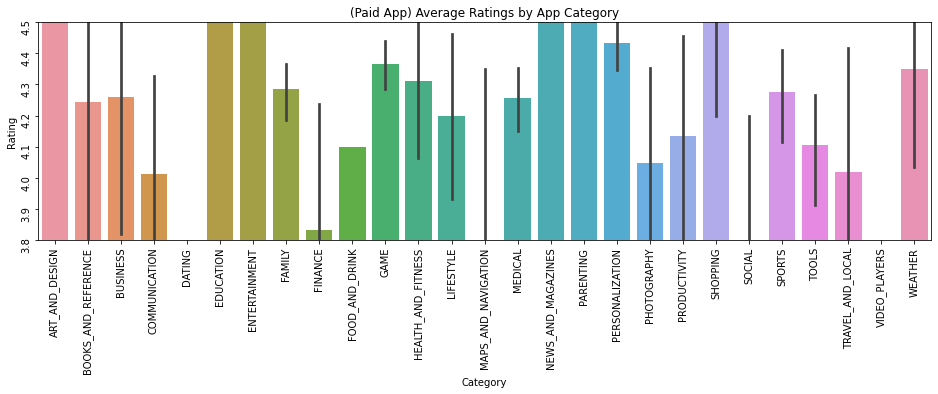

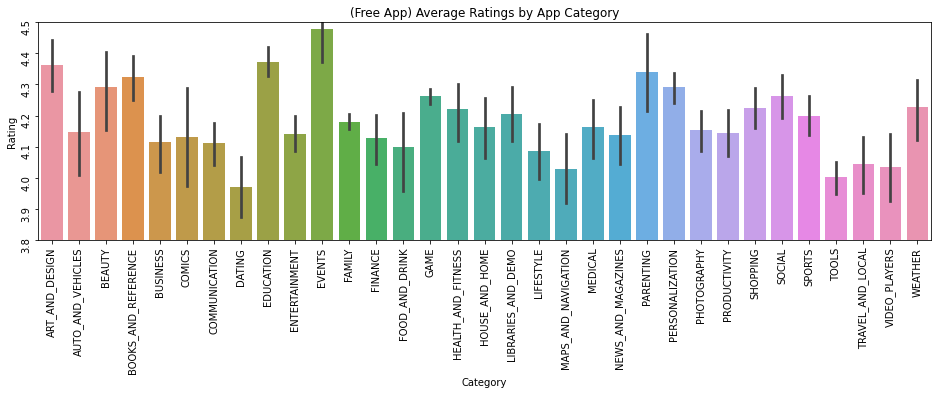

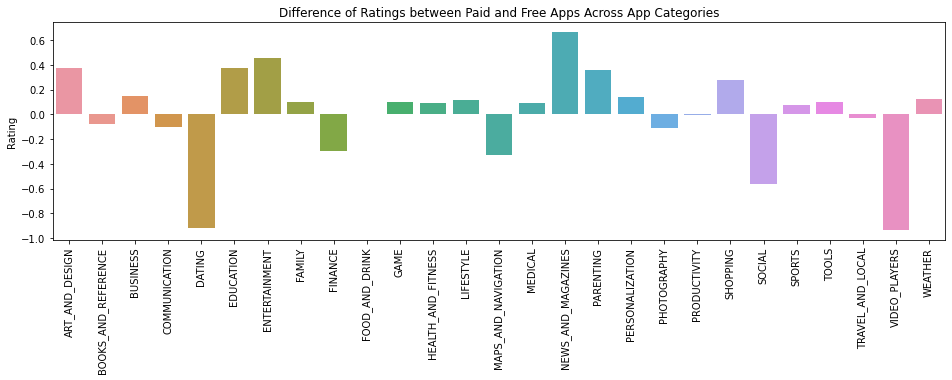

In [14]:
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

Платные приложения в категориях Parenting и Social оцениваются ниже чем в в бесплатных.

Также платные приложения в котегориях News and Magazzines, Entertainment и Educations оцениваются выше чем в бесплатных.

Самые высокие оценки платных приложении в категориях Art and Design, Auto and Vehicles, Education, Entertainment, News and Magazine и Shopping.

Самые низкие оценки платных приложении в категориях Dating, Social, Finance, Pareting и Maps and Nobigators.

Самые высокие оценки бесплатных приложении в категории Events.